In [5]:
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.transform import resize, rotate
import PIL
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img, smart_resize
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc




In [6]:
def cnn_model():

    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))  
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3)))  
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3))) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) 
    model.add(Dense(500)) 
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1)) # single output neuron (output ranged from 0-1; binary class)
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy',
                optimizer=Adam(), 
                metrics=['accuracy'])
    return model

Found 144 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Epoch 1/750
3/3 [==============================] - 3s 672ms/step - loss: 0.7113 - accuracy: 0.4028 - val_loss: 0.7184 - val_accuracy: 0.5000
Epoch 2/750
3/3 [==============================] - 1s 482ms/step - loss: 0.7176 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/750
3/3 [==============================] - 1s 439ms/step - loss: 0.6861 - accuracy: 0.5833 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 4/750
3/3 [==============================] - 1s 455ms/step - loss: 0.7035 - accuracy: 0.4861 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/750
3/3 [==============================] - 1s 419ms/step - loss: 0.6887 - accuracy: 0.5556 - val_loss: 0.6997 - val_accuracy: 0.5000
Epoch 6/750
3/3 [==============================] - 1s 447ms/step - loss: 0.6890 - accuracy: 0.5417 - val_loss: 0.7017 - val_accuracy: 0.5000
Epoch 7/750
3/3 [==============================] - 1s 455ms/step - loss: 

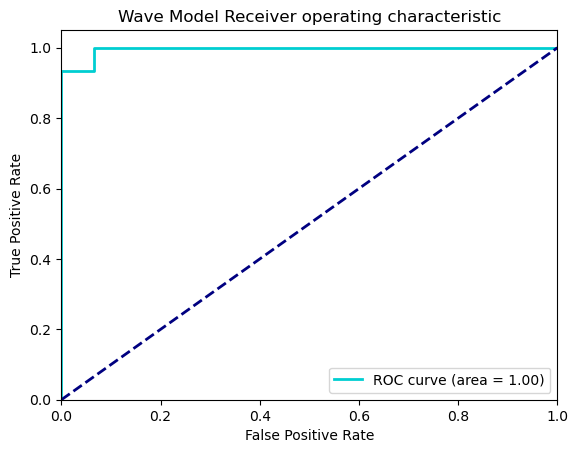

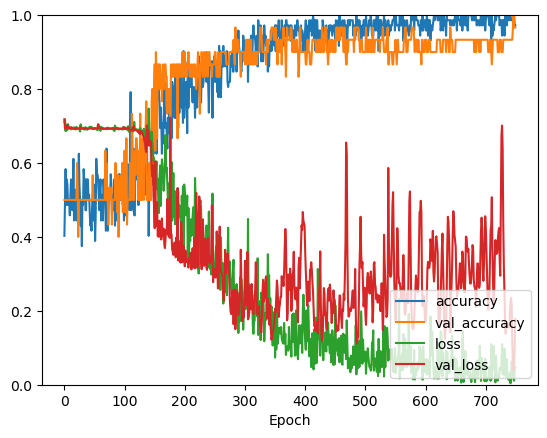

In [4]:
if __name__=='__main__':
    img_width, img_height = 128, 128 
    train_data_dir = 'content//wave//training'
    validation_data_dir = 'content//wave//testing'
    epochs = 750 # was 400
    batch_size = 24

    if K.image_data_format() == 'channels_first':
        input_shape = (3, img_width, img_height)
    else:
        input_shape = (img_width, img_height, 3)

    model = cnn_model()

    wave_train_datagen = ImageDataGenerator(
        zoom_range=0.2,
        height_shift_range=0.1,
        rescale=1./255,
        shear_range=0.2,
        horizontal_flip=True,
        ) 

    
    wave_test_datagen = ImageDataGenerator(rescale=1./255)

   
    train_generator = wave_train_datagen.flow_from_directory(
            train_data_dir, 
            target_size=(img_width, img_height),
            batch_size=24,
            class_mode='binary',
            shuffle = True
            ) 

    
    validation_generator = wave_test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=30,
            class_mode='binary',
            shuffle = False)

    
    history = model.fit(
                train_generator,
                steps_per_epoch=3,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=1)


In [7]:
 model.evaluate(validation_generator)

1/1 [==============================] - 1s 511ms/step - loss: 0.1782 - accuracy: 0.9667


[0.17819707095623016, 0.9666666388511658]

1/1 [==============================] - 0s 94ms/step


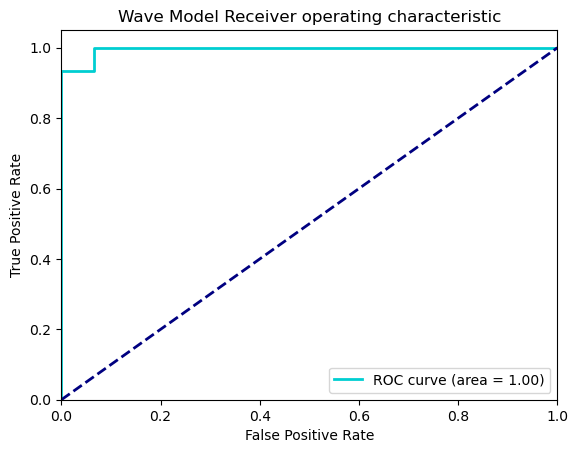

In [8]:
STEP_SIZE_TEST = validation_generator.n//validation_generator.batch_size
validation_generator.reset()
x, classes = next(validation_generator)
preds = model.predict(x, verbose=1)
fpr, tpr, _ = roc_curve(classes,preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkturquoise',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Wave Model Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

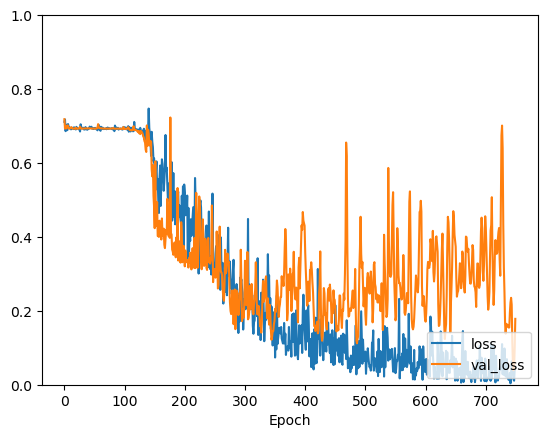

In [9]:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()

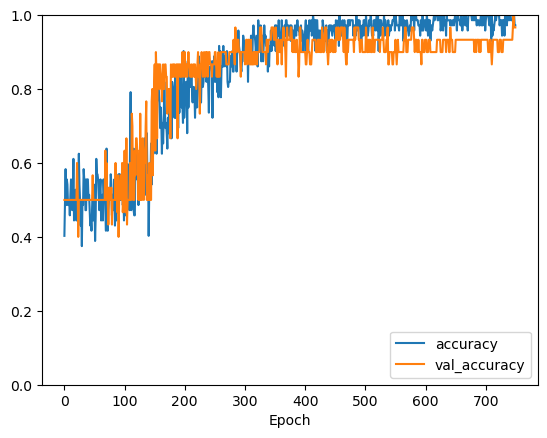

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()

In [11]:
import pickle

In [12]:
filename="cnn_wave.PKL"
pickle.dump(model, open(filename , 'wb'))

In [13]:
cnn_wave_model= pickle.load(open("cnn_wave.PKL",'rb'))